In [1]:
import pandas as pd
import nltk
import os
import re
import string
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
%matplotlib inline

In [68]:
sw_dir = './sw.txt'
stop_words = []
with open(sw_dir) as f:
    text = f.readlines()
    for word in text:
        stop_words.append(re.findall('\S+', word)[0])

# adding br and empty string to stop words
stop_words.append('br')
stop_words.append('')

In [2]:
df_tr = pd.read_csv('./sndQuestion/train.csv')
df_total = pd.DataFrame(df_tr,columns=['qid','question_text','target']);

inp_df = df_total.drop(df_total.columns[[0,2]], axis=1)
out_df = df_total.drop(df_total.columns[[0,1]], axis=1)
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(inp_df,out_df, test_size=0.2, random_state=42)


df_train= pd.concat([df_x_train, df_y_train], axis=1, sort=False)
df_test= pd.concat([df_x_test, df_y_test], axis=1, sort=False)

In [3]:
def remove_punct(text):
    
    def change(ch):
        if ch in string.punctuation or ch.isdigit():
            return " "
        else:
            return ch
    
    no_punct = "".join([change(ch) for ch in text])
    return no_punct


In [4]:
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens


In [5]:
def remove_sw(tokens):
    text = [w for w in tokens if w not in stop_words]
    return text


In [6]:
def remove_short(tokens):
    text = [w for w in tokens if len(w)>2]
    return text


In [7]:
wn = nltk.WordNetLemmatizer()
def lemmatizing(tokens):
    text = [wn.lemmatize(w) for w in tokens]
    return text

ps = nltk.stem.PorterStemmer()
def stemming(tokens):
    text = [ps.stem(w) for w in tokens]
    return text


In [8]:
def clean_text(text):
    text = remove_punct(text)
    text = tokenize(text)
    text = remove_sw(text)
    text = remove_short(text)
    text = lemmatizing(text)
    text = stemming(text)
    return text
count_vect = CountVectorizer(analyzer=clean_text,
                             lowercase=True,
                             binary=True)

X_train = count_vect.fit_transform(df_x_train['question_text'])
y_train = df_y_train['target'].to_numpy(dtype='int')

X_test = count_vect.transform(df_x_test['question_text'])
y_test = df_y_test['target'].to_numpy(dtype='int')

NameError: name 'stop_words' is not defined

In [77]:
clf = MultinomialNB(alpha=1)
clf = clf.fit(X_train,y_train)

In [78]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

acc_tr = clf.score(X_train, y_train)
acc_te = clf.score(X_test, y_test)

print("train accuracy: {}%".format(acc_tr*100))
print("test accuracy: {}%".format(acc_te*100))

train accuracy: 93.61152343245315%
test accuracy: 93.61699684180304%


In [79]:
f1_score(y_test, y_pred)


0.5551227321237994

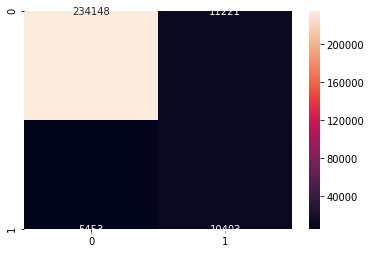

In [80]:
sns.heatmap(cm, annot=True, fmt='d')

In [81]:
submission = pd.DataFrame({
        "question_text": df_test["question_text"],
        "target": y_pred
    })
submission.to_csv('out.csv', index=False)